# Multiple Linear Regression
## Car Pricing Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

#### Business Goal 

- We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


In [1597]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1598]:
import numpy as np
import pandas as pd

In [1599]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1600]:
# Importing the dataset
cars = pd.read_csv('CarPrice_Assignment.csv')

In [1601]:
#Preview of the dataset
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0

In [1602]:
cars.shape

(205, 26)

In [1603]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1604]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight   curbweight  enginesize   boreratio      stroke  compressionratio  horsepower      peakrpm     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   205.000000  205.000000  205.000000  205.000000        205.000000  205.000000   205.000000  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878  2555.565854  126.907317    3.329756    3.255415         10.142537  104.117073  5125.121951   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   520.680204   41.642693    0.270844    0.313597          3.972040   39.544167   476.985643    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000  1488.000000   61.000000    2.540000    2.070000          7.000000   48.000000  4150.000000   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000  2145.000000   97.000000    3.150000    3.110000          8.600000   70.000000  4800.000000   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000  2414.000000  120.000000    3.310000    3.290000          9.000000   95.000000  5200.000000   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000  2935.000000  141.000000    3.580000    3.410000          9.400000  116.000000  5500.000000   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000  4066.000000  326.000000    3.940000    4.170000         23.000000  288.000000  6600.000000   49.000000   54.000000  45400.000000

In [1605]:
import matplotlib.pyplot as plt
import seaborn as sns

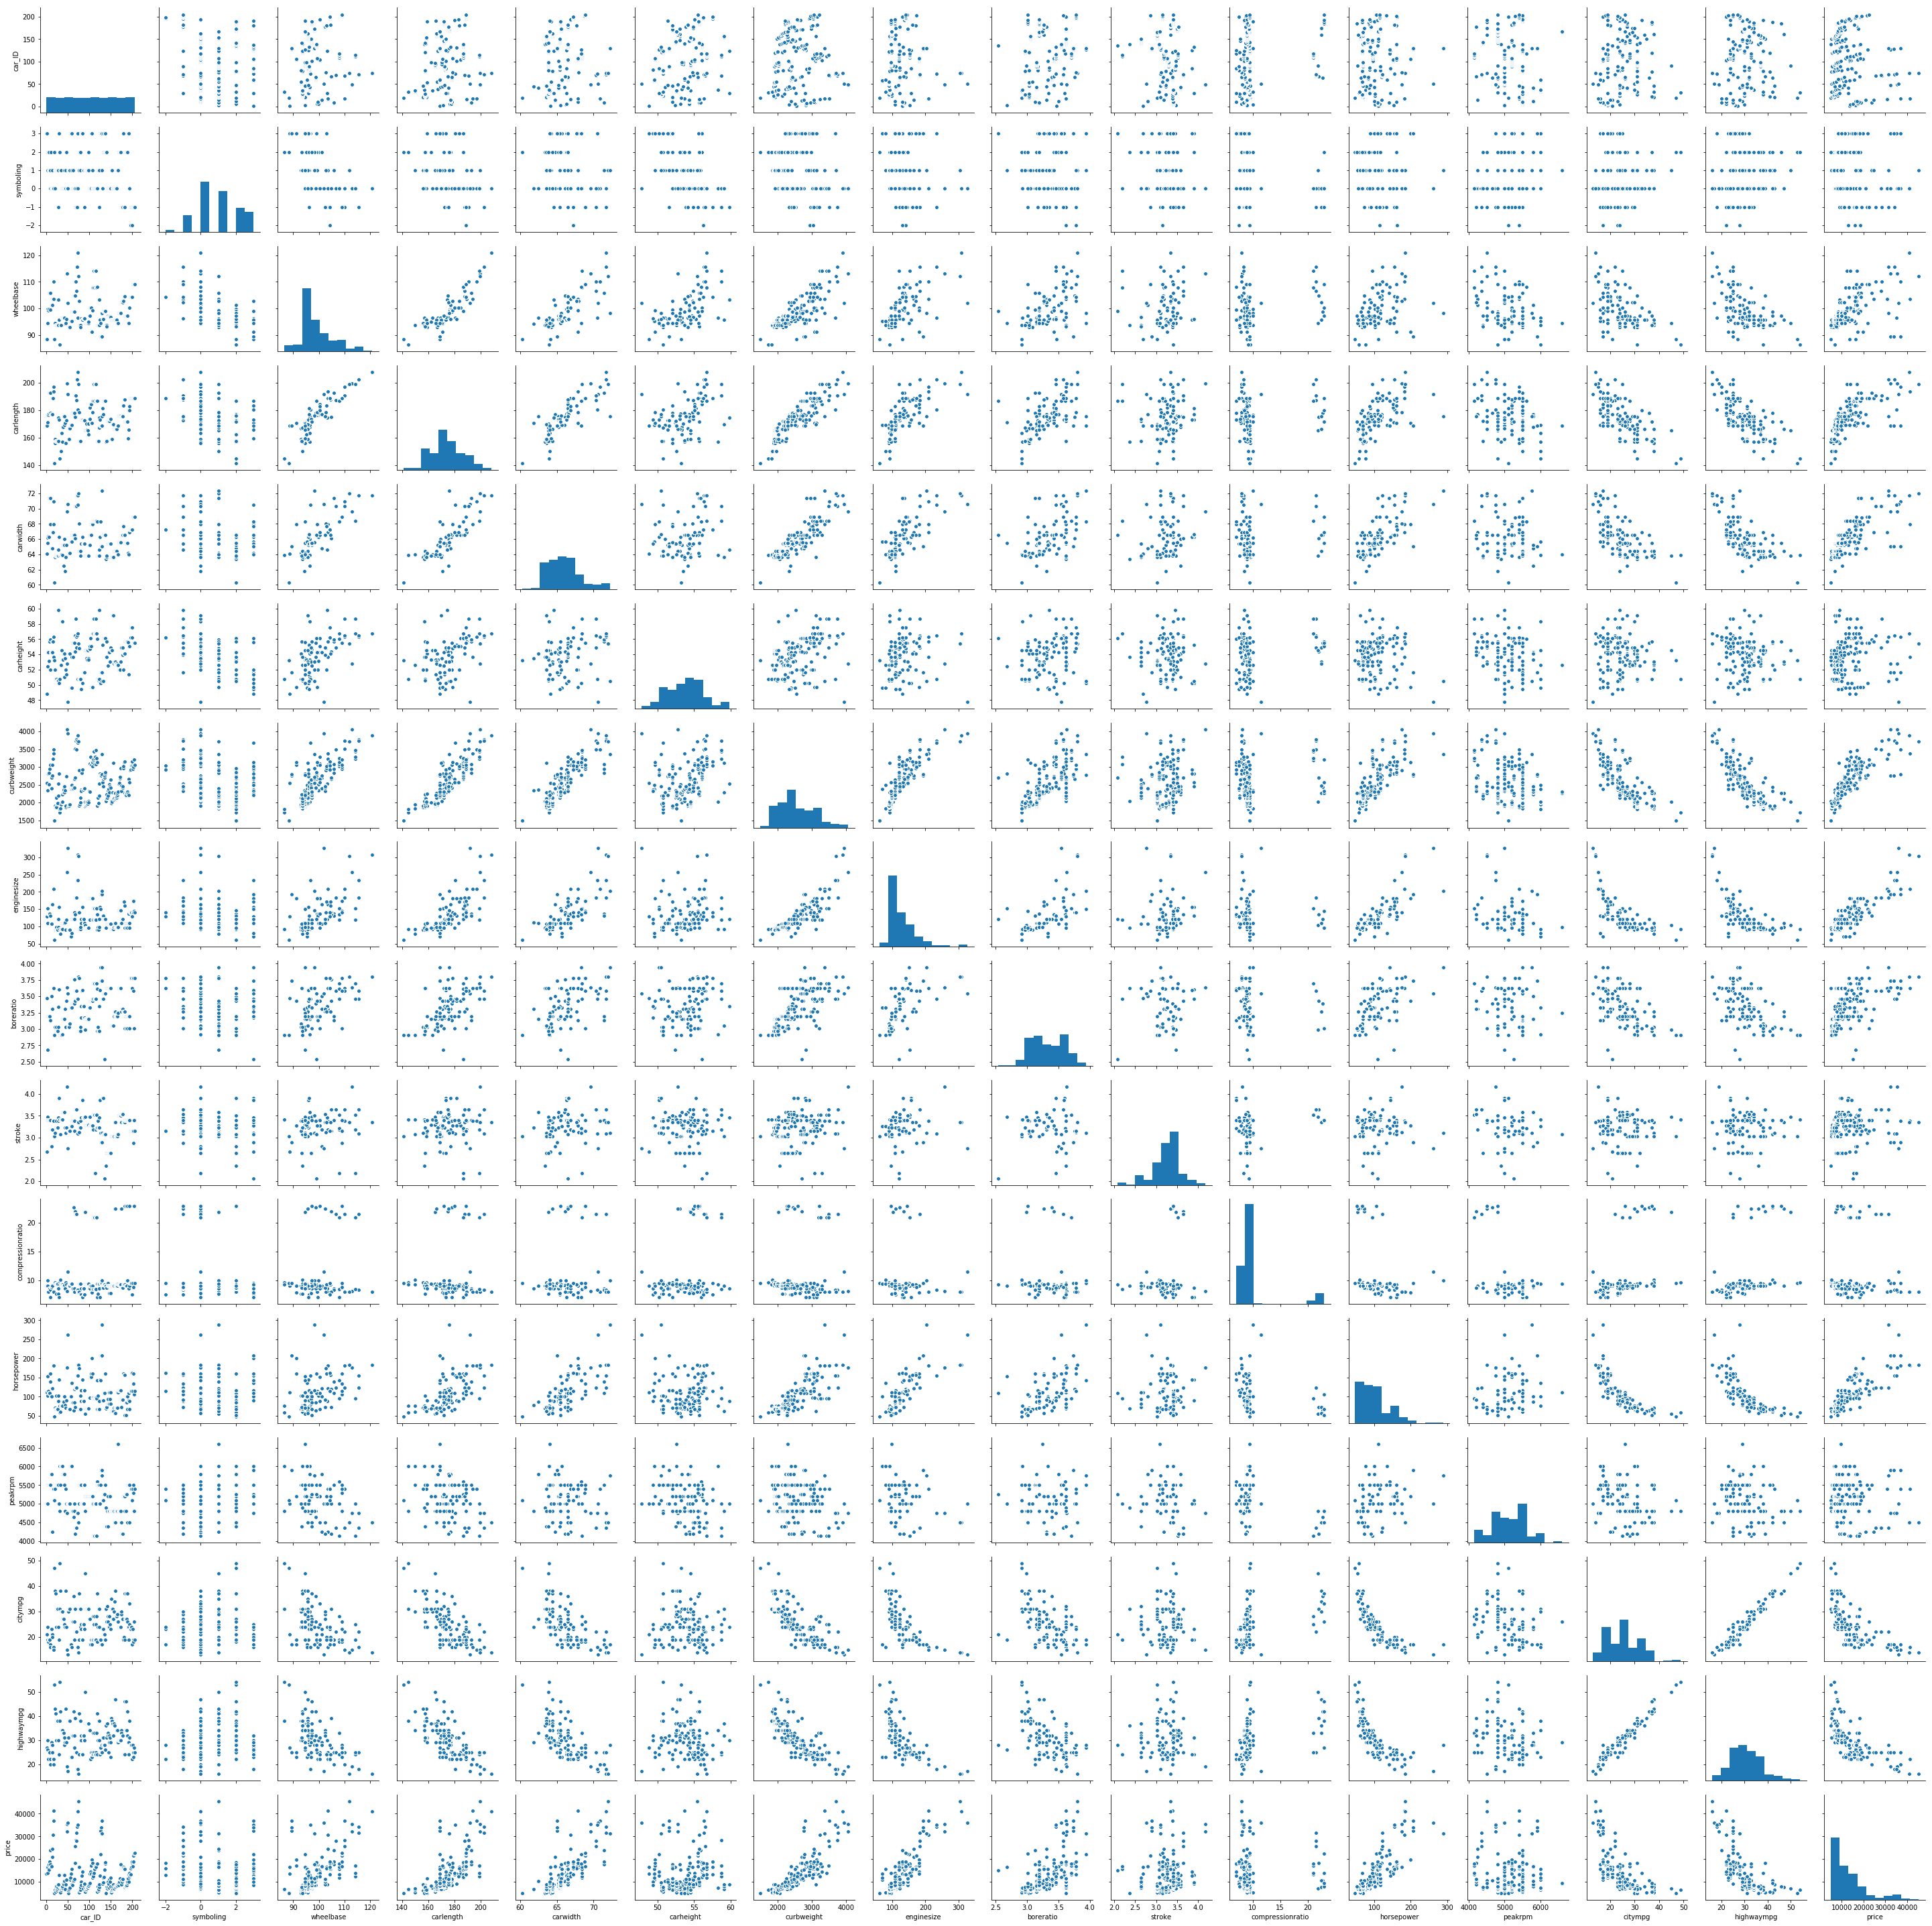

In [1606]:
#Plotting pair plots for all the numeric varibles
sns.pairplot(cars)
plt.show()

#### Data Preparation

- There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [1607]:
#Creating a column company from the CarName column
cars['company'] = cars.apply(lambda row: row.CarName[:row.CarName.find(' ')], axis=1)

In [1608]:
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price      company
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [1609]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subar', 'subaru', 'toyota',
       'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [1610]:
#Modify values when necessary
cars.company.replace(to_replace='maxda',value='mazda',inplace=True)
cars.company.replace(to_replace='alfa-romero',value='alfa-romeo',inplace=True)
cars.company.replace(to_replace='Nissan',value='nissan',inplace=True)
cars.company.replace(to_replace='subar',value='subaru',inplace=True)
cars.company.replace(to_replace='toyouta',value='toyota',inplace=True)
cars.company.replace(to_replace='porcshce',value='porsche',inplace=True)
cars.company.replace(to_replace='vw',value='volkswagen',inplace=True)
cars.company.replace(to_replace='vokswagen',value='volkswagen',inplace=True)
cars.doornumber.replace(to_replace='four',value=4,inplace=True)
cars.doornumber.replace(to_replace='two',value=2,inplace=True)
cars.cylindernumber.replace(to_replace='four',value=4,inplace=True)
cars.cylindernumber.replace(to_replace='six',value=6,inplace=True)
cars.cylindernumber.replace(to_replace='three',value=3,inplace=True)
cars.cylindernumber.replace(to_replace='twelve',value=12,inplace=True)
cars.cylindernumber.replace(to_replace='two',value=2,inplace=True)
cars.cylindernumber.replace(to_replace='eight',value=8,inplace=True)
cars.cylindernumber.replace(to_replace='five',value=5,inplace=True)

In [1611]:
#Create boxplots for all categorical variables with price
plt.figure(figsize=(30, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = cars)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.subplot(4,3,11)
a=sns.boxplot(x = 'company', y = 'price', data = cars)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
plt.show()

In [1612]:
# Get the dummy variables for the feature 'company' and store it in a new variable - 'companies'
companies = pd.get_dummies(data=cars.company)
companies.head()

alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
1           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
2           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
3           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
4           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0

In [1613]:
# Add the results to the cars dataframe
cars = pd.concat([cars, companies], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling                   CarName fueltype aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price     company  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0       1          3        alfa-romero giulia      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romeo           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
1       2          3       alfa-romero stelvio      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romeo           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
2       3          1  alfa-romero Quadrifoglio      gas        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romeo           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
3       4          2               audi 100 ls      gas        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0        audi           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
4       5          2                audi 100ls      gas        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0        audi           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0

In [1614]:
# Drop 'fueltype' as we have created the dummies for it
cars.drop(['company'], axis = 1, inplace = True)
cars.head()

car_ID  symboling                   CarName fueltype aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0       1          3        alfa-romero giulia      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
1       2          3       alfa-romero stelvio      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
2       3          1  alfa-romero Quadrifoglio      gas        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
3       4          2               audi 100 ls      gas        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
4       5          2                audi 100ls      gas        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0

In [1615]:
# Drop 'fueltype' as we have created the dummies for it
cars.drop(['CarName'], axis = 1, inplace = True)
cars.head()

car_ID  symboling fueltype aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0       1          3      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
1       2          3      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
2       3          1      gas        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
3       4          2      gas        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
4       5          2      gas        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0

In [1616]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fuel_type'

fuel_type = pd.get_dummies(cars['fueltype'], drop_first=True)

# Check what the dataset 'status' looks like
fuel_type.head()

gas
0    1
1    1
2    1
3    1
4    1

Now, you don't need two columns. You can drop the `diesel` column, as the fueltype can be identified with just one column where 
- `1` will correspond to `gas`
- `0` will correspond to `diesel`

In [1617]:
# Add the results to the cars dataframe
cars = pd.concat([cars, fuel_type], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling fueltype aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas
0       1          3      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
1       2          3      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
2       3          1      gas        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
3       4          2      gas        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
4       5          2      gas        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1

In [1618]:
# Drop 'fueltype' as we have created the dummies for it
cars.drop(['fueltype'], axis = 1, inplace = True)
cars.head()

car_ID  symboling aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas
0       1          3        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
1       2          3        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
2       3          1        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
3       4          2        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1
4       5          2        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1

In [1619]:
# Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'aspiration_type'

aspiration_type = pd.get_dummies(cars['aspiration'], drop_first=True)

# Check what the dataset 'status' looks like
aspiration_type.head()

turbo
0      0
1      0
2      0
3      0
4      0

Now, you don't need two columns. You can drop the `std` column, as the aspiration can be identified with just one column where
- `0` will correspond to `std`
- `1` will correspond to `turbo`

In [1620]:
# Add the results to the cars dataframe
cars = pd.concat([cars, aspiration_type], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo
0       1          3        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
1       2          3        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
2       3          1        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
3       4          2        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
4       5          2        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0

In [1621]:
# Drop 'aspiration' as we have created the dummies for it
cars.drop(['aspiration'], axis = 1, inplace = True)
cars.head()

car_ID  symboling  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo
0       1          3           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
1       2          3           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
2       3          1           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
3       4          2           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0
4       5          2           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0

In [1622]:
cars.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [1623]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'car_body'

car_body = pd.get_dummies(cars['carbody'],drop_first=True)

# Check what the dataset 'car_body' looks like
car_body.head()

hardtop  hatchback  sedan  wagon
0        0          0      0      0
1        0          0      0      0
2        0          1      0      0
3        0          0      1      0
4        0          0      1      0

Now, you don't need five columns. You can drop the `convertible` column, as the carbody can be identified with just 4 columns where
- `0000` will correspond to `convertible`
- `0100` will correspond to `hatchback`
- `1000` will correspond to `hardtop`
- `0010` will correspond to `sedan`
- `0001` will correspond to `wagon`

In [1624]:
# Add the results to the cars dataframe
cars = pd.concat([cars, car_body], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon
0       1          3           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0
1       2          3           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0
2       3          1           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0
3       4          2           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0
4       5          2           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0

In [1625]:
# Drop 'carbody' as we have created the dummies for it
cars.drop(['carbody'], axis = 1, inplace = True)
cars.head()

car_ID  symboling  doornumber drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon
0       1          3           2        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0
1       2          3           2        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0
2       3          1           2        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0
3       4          2           4        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0
4       5          2           4        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0

In [1626]:
cars.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [1627]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheel_types'

drivewheel_types = pd.get_dummies(cars['drivewheel'],drop_first=True)

# Check what the dataset 'car_body' looks like
drivewheel_types.head()

fwd  rwd
0    0    1
1    0    1
2    0    1
3    1    0
4    0    0

Now, you don't need three columns. You can drop the `4wd` column, as the carbody can be identified with just 2 columns where
- `01` will correspond to `rwd`
- `10` will correspond to `fwd`
- `00` will correspond to `4wd`

In [1628]:
# Add the results to the cars dataframe
cars = pd.concat([cars, drivewheel_types], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling  doornumber drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd
0       1          3           2        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1
1       2          3           2        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1
2       3          1           2        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1
3       4          2           4        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0
4       5          2           4        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0

In [1629]:
# Add the results to the cars dataframe
cars = pd.concat([cars, drivewheel_types], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling  doornumber drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd
0       1          3           2        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1
1       2          3           2        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1
2       3          1           2        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1
3       4          2           4        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0
4       5          2           4        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0

In [1630]:
# Drop 'drivewheel' as we have created the dummies for it
cars.drop(['drivewheel'], axis = 1, inplace = True)
cars.head()

car_ID  symboling  doornumber enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd
0       1          3           2          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1
1       2          3           2          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1
2       3          1           2          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1
3       4          2           4          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0
4       5          2           4          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0

In [1631]:
cars.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [1632]:
# Get the dummy variables for the feature 'enginelocation' and store it in a new variable - 'eng_loc'

eng_loc = pd.get_dummies(cars['enginelocation'],drop_first=True)

# Check what the dataset 'car_body' looks like
eng_loc.head()

rear
0     0
1     0
2     0
3     0
4     0

Now, you don't need two columns. You can drop the `front` column, as the carbody can be identified with just 1 column where
- `1` will correspond to `rear`
- `0` will correspond to `front`

In [1633]:
# Add the results to the cars dataframe
cars = pd.concat([cars, eng_loc], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling  doornumber enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd  rear
0       1          3           2          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0
1       2          3           2          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0
2       3          1           2          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1     0
3       4          2           4          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0     0
4       5          2           4          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0     0

In [1634]:
# Drop 'enginelocation' as we have created the dummies for it
cars.drop(['enginelocation'], axis = 1, inplace = True)
cars.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd  rear
0       1          3           2       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0
1       2          3           2       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0
2       3          1           2       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1     0
3       4          2           4       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0     0
4       5          2           4       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0     0

In [1635]:
cars.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [1636]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'eng_type'

eng_type = pd.get_dummies(cars['enginetype'],drop_first=True)

# Check what the dataset 'car_body' looks like
eng_type.head()

dohcv  l  ohc  ohcf  ohcv  rotor
0      0  0    0     0     0      0
1      0  0    0     0     0      0
2      0  0    0     0     1      0
3      0  0    1     0     0      0
4      0  0    1     0     0      0

Now, you don't need seven columns. You can drop the `dohc` column, as the carbody can be identified with just 6 columns where
- `000000` will correspond to `dohc`
- `100000` will correspond to `dohcv`
- `010000` will correspond to `l`
- `001000` will correspond to `ohc`
- `000100` will correspond to `ohcf`
-m `000010` will correspond to `ohcv`
- `000001` will correspond to `rotor`

In [1637]:
# Add the results to the cars dataframe
cars = pd.concat([cars, eng_type], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor
0       1          3           2       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0
1       2          3           2       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0
2       3          1           2       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1     0      0  0    0     0     1      0
3       4          2           4       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0     0      0  0    1     0     0      0
4       5          2           4       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0     0      0  0    1     0     0      0

In [1638]:
# Drop 'enginetype' as we have created the dummies for it
cars.drop(['enginetype'], axis = 1, inplace = True)
cars.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor
0       1          3           2       88.6      168.8      64.1       48.8        2548               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0
1       2          3           2       88.6      168.8      64.1       48.8        2548               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0
2       3          1           2       94.5      171.2      65.5       52.4        2823               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1     0      0  0    0     0     1      0
3       4          2           4       99.8      176.6      66.2       54.3        2337               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0     0      0  0    1     0     0      0
4       5          2           4       99.4      176.6      66.4       54.3        2824               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0     0      0  0    1     0     0      0

In [1639]:
cars.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [1640]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fuel_sys'

fuel_sys = pd.get_dummies(cars['fuelsystem'],drop_first=True)

# Check what the dataset 'car_body' looks like
fuel_sys.head()

2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0     0     0    0    0     1     0     0
1     0     0    0    0     1     0     0
2     0     0    0    0     1     0     0
3     0     0    0    0     1     0     0
4     0     0    0    0     1     0     0

Now, you don't need eight columns. You can drop the `1bbl` column, as the carbody can be identified with just 7 columns where
- `0000000` will correspond to `1bbl`
- `1000000` will correspond to `2bbl`
- `0100000` will correspond to `4bbl`
- `0010000` will correspond to `idi`
- `0001000` will correspond to `mfi`
- `0000100` will correspond to `mpfi`
- `0000010` will correspond to `spdi`
- `0000001` will correspond to `spfi`

In [1641]:
# Add the results to the cars dataframe
cars = pd.concat([cars, fuel_sys], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0       1          3           2       88.6      168.8      64.1       48.8        2548               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0
1       2          3           2       88.6      168.8      64.1       48.8        2548               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0
2       3          1           2       94.5      171.2      65.5       52.4        2823               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1     0      0  0    0     0     1      0     0     0    0    0     1     0     0
3       4          2           4       99.8      176.6      66.2       54.3        2337               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0
4       5          2           4       99.4      176.6      66.4       54.3        2824               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0

In [1642]:
# Drop 'fuelsystem' as we have created the dummies for it
cars.drop(['fuelsystem'], axis = 1, inplace = True)
cars.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0       1          3           2       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  13495.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0
1       2          3           2       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0
2       3          1           2       94.5      171.2      65.5       52.4        2823               6         152       2.68    3.47               9.0         154     5000       19          26  16500.0           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1     0      0  0    0     0     1      0     0     0    0    0     1     0     0
3       4          2           4       99.8      176.6      66.2       54.3        2337               4         109       3.19    3.40              10.0         102     5500       24          30  13950.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0
4       5          2           4       99.4      176.6      66.4       54.3        2824               5         136       3.19    3.40               8.0         115     5500       18          22  17450.0           0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      1      0    0    0    0    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [1643]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. It is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation

This time, we will use MinMax scaling.

In [1644]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','doornumber','cylindernumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price  alfa-romeo  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  gas  turbo  hardtop  hatchback  sedan  wagon  fwd  rwd  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
122     123        0.6         1.0   0.244828   0.426016  0.291667   0.265487    0.272692             0.2    0.139623   0.230159  0.525253           0.15000    0.083333  0.551020  0.500000    0.567568  0.068818           0     0    0      0          0      0      0      0       0      0        0           0       0        0         1        0        0     0       0       0           0      0    1      0        0          0      1      0    1    0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0
125     126        1.0         0.0   0.272414   0.452033  0.666667   0.212389    0.500388             0.2    0.339623   1.000000  0.464646           0.15625    0.395833  0.551020  0.166667    0.270270  0.466890           0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        1        0     0       0       0           0      0    1      0        0          1      0      0    0    1    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0
166     167        0.6         0.0   0.272414   0.448780  0.308333   0.424779    0.314973             0.2    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000  0.361111    0.324324  0.122110           0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0    1      0        0          1      0      0    0    1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0
1         2        1.0         0.0   0.068966   0.450407  0.316667   0.088496    0.411171             0.2    0.260377   0.626984  0.247475           0.12500    0.262500  0.346939  0.222222    0.270270  0.314446           1     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0    1      0        0          0      0      0    0    1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0
199     200        0.2         1.0   0.610345   0.775610  0.575000   0.858407    0.647401             0.2    0.260377   0.746032  0.484848           0.03125    0.475000  0.387755  0.111111    0.135135  0.382131           0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      1    1      1        0          0      0      1    0    1    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0

In [1645]:
#Checking if scaling is done
df_train.describe()

car_ID   symboling  doornumber   wheelbase   carlength    carwidth   carheight  curbweight  cylindernumber  enginesize   boreratio      stroke  compressionratio  horsepower     peakrpm     citympg  highwaympg       price  alfa-romeo        audi         bmw       buick   chevrolet       dodge       honda       isuzu      jaguar       mazda  mercury  mitsubishi      nissan     peugeot    plymouth     porsche     renault        saab      subaru      toyota  volkswagen       volvo         gas       turbo     hardtop   hatchback       sedan       wagon         fwd         rwd         fwd         rwd        rear       dohcv           l         ohc        ohcf        ohcv       rotor        2bbl        4bbl         idi    mfi        mpfi        spdi   spfi
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000      143.000000  143.000000  143.000000  143.000000        143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000    143.0  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.0  143.000000  143.000000  143.0
mean    98.524476    0.559441    0.559441    0.411141    0.525476    0.461655    0.509004    0.407878        0.240559    0.241351    0.497946    0.535389          0.190787    0.227302    0.400029    0.344211    0.374976    0.219310    0.020979    0.034965    0.041958    0.034965    0.020979    0.041958    0.062937    0.020979    0.020979    0.090909      0.0    0.062937    0.097902    0.055944    0.027972    0.020979    0.013986    0.020979    0.076923    0.139860    0.048951    0.041958    0.909091    0.181818    0.020979    0.342657    0.475524    0.132867    0.594406    0.349650    0.594406    0.349650    0.006993    0.006993    0.062937    0.685315    0.083916    0.062937    0.027972    0.349650    0.020979    0.090909    0.0    0.440559    0.041958    0.0
std     58.977655    0.239200    0.498199    0.205581    0.204848    0.184517    0.215378    0.211269        0.115818    0.154619    0.207140    0.157843          0.237181    0.165511    0.196438    0.186165    0.188477    0.215682    0.143818    0.184337    0.201198    0.184337    0.143818    0.201198    0.243703    0.143818    0.143818    0.288490      0.0    0.243703    0.298227    0.230621    0.165472    0.143818    0.117845    0.143818    0.267406    0.348061    0.216524    0.201198    0.288490    0.387050    0.143818    0.476266    0.501156    0.340624    0.492733    0.478536    0.492733    0.478536    0.083624    0.083624    0.243703    0.466023    0.278236    0.243703    0.165472    0.478536    0.143818    0.288490    0.0    0.498199    0.201198    0.0
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000        0.000000    0.000000    0.000000    0.000000          0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000      0.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.0    0.000000    0.000000    0.0
25%     48.500000    0.400000    0.000000    0.272414    0.399187    0.304167    0.353982    0.245539        0.200000    0.135849    0.305556    0.464646   

In [1646]:
#Create X_train and Y_train from the train data
Y_train = df_train.pop('price')
X_train=df_train[df_train.columns.difference(['company'])]

In [1647]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 30))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1648]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1649]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('2bbl', False, 13),
 ('4bbl', False, 10),
 ('alfa-romeo', False, 11),
 ('audi', False, 21),
 ('bmw', True, 1),
 ('boreratio', True, 1),
 ('buick', True, 1),
 ('car_ID', False, 30),
 ('carheight', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('chevrolet', False, 2),
 ('citympg', True, 1),
 ('compressionratio', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('dodge', True, 1),
 ('dohcv', True, 1),
 ('doornumber', False, 19),
 ('enginesize', True, 1),
 ('fwd', False, 15),
 ('fwd', False, 22),
 ('gas', True, 1),
 ('hardtop', False, 4),
 ('hatchback', False, 3),
 ('highwaympg', False, 12),
 ('honda', True, 1),
 ('horsepower', True, 1),
 ('idi', True, 1),
 ('isuzu', False, 16),
 ('jaguar', False, 18),
 ('l', True, 1),
 ('mazda', False, 23),
 ('mercury', False, 34),
 ('mfi', False, 32),
 ('mitsubishi', True, 1),
 ('mpfi', False, 27),
 ('nissan', False, 17),
 ('ohc', False, 8),
 ('ohcf', False, 7),
 ('ohcv', False, 28),
 ('peakrpm', True, 1),
 ('peugeot', T

In [1650]:
#These columns support the model
col = X_train.columns[rfe.support_]
col

Index(['bmw', 'boreratio', 'buick', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'cylindernumber', 'dodge', 'dohcv', 'enginesize', 'gas', 'honda', 'horsepower', 'idi', 'l', 'mitsubishi', 'peakrpm', 'peugeot', 'plymouth', 'porsche', 'rear', 'rotor', 'saab', 'stroke', 'turbo', 'volvo', 'wheelbase'], dtype='object')

In [1651]:
#These columns don't support the model
X_train.columns[~rfe.support_]

Index(['2bbl', '4bbl', 'alfa-romeo', 'audi', 'car_ID', 'chevrolet', 'doornumber', 'fwd', 'fwd', 'hardtop', 'hatchback', 'highwaympg', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mfi', 'mpfi', 'nissan', 'ohc', 'ohcf', 'ohcv', 'renault', 'rwd', 'rwd', 'sedan', 'spdi', 'spfi', 'subaru', 'symboling', 'toyota', 'volkswagen', 'wagon'], dtype='object')

In [1652]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1653]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1654]:
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [1655]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     92.49
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           1.06e-65
Time:                        18:06:41   Log-Likelihood:                 246.34
No. Observations:                 143   AIC:                            -432.7
Df Residuals:                     113   BIC:                            -343.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2095      0.082  

In [1656]:
X_train_rfe.columns

Index(['const', 'bmw', 'boreratio', 'buick', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'cylindernumber', 'dodge', 'dohcv', 'enginesize', 'gas', 'honda', 'horsepower', 'idi', 'l', 'mitsubishi', 'peakrpm', 'peugeot', 'plymouth', 'porsche', 'rear', 'rotor', 'saab', 'stroke', 'turbo', 'volvo', 'wheelbase'], dtype='object')

In [1657]:
#Drop the features with negative coefficients
drop_cols = list(lm.params[lm.params < 0].index)
print(drop_cols)
X_train_rfe = X_train_rfe.drop(columns=drop_cols)
X_train_rfe.head()

['boreratio', 'carheight', 'carlength', 'compressionratio', 'cylindernumber', 'dodge', 'gas', 'honda', 'horsepower', 'mitsubishi', 'peugeot', 'plymouth', 'stroke']


const  bmw  buick  carwidth   citympg  curbweight  dohcv  enginesize  idi  l   peakrpm  porsche  rear  rotor  saab  turbo  volvo  wheelbase
122    1.0    0      0  0.291667  0.500000    0.272692      0    0.139623    0  0  0.551020        0     0      0     0      0      0   0.244828
125    1.0    0      0  0.666667  0.166667    0.500388      0    0.339623    0  0  0.551020        1     0      0     0      0      0   0.272414
166    1.0    0      0  0.308333  0.361111    0.314973      0    0.139623    0  0  1.000000        0     0      0     0      0      0   0.272414
1      1.0    0      0  0.316667  0.222222    0.411171      0    0.260377    0  0  0.346939        0     0      0     0      0      0   0.068966
199    1.0    0      0  0.575000  0.111111    0.647401      0    0.260377    0  0  0.387755        0     0      0     0      1      1   0.610345

In [1658]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     96.22
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           3.16e-63
Time:                        18:09:30   Log-Likelihood:                 206.08
No. Observations:                 143   AIC:                            -376.2
Df Residuals:                     125   BIC:                            -322.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2967      0.054     -5.530      0.0

In [1659]:
#Drop the features with negative coefficients
drop_cols = list(lm.params[lm.params < 0].index)
print(drop_cols)
X_train_rfe = X_train_rfe.drop(columns=drop_cols)
X_train_rfe.head()

['const', 'dohcv', 'idi', 'l', 'wheelbase']


bmw  buick  carwidth   citympg  curbweight  enginesize   peakrpm  porsche  rear  rotor  saab  turbo  volvo
122    0      0  0.291667  0.500000    0.272692    0.139623  0.551020        0     0      0     0      0      0
125    0      0  0.666667  0.166667    0.500388    0.339623  0.551020        1     0      0     0      0      0
166    0      0  0.308333  0.361111    0.314973    0.139623  1.000000        0     0      0     0      0      0
1      0      0  0.316667  0.222222    0.411171    0.260377  0.346939        0     0      0     0      0      0
199    0      0  0.575000  0.111111    0.647401    0.260377  0.387755        0     0      0     0      1      1

In [1660]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           6.13e-67
Time:                        18:09:31   Log-Likelihood:                 204.93
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     129   BIC:                            -340.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2622      0.044     -5.906      0.0

In [1661]:
X_train_lm.columns

Index(['const', 'bmw', 'buick', 'carwidth', 'citympg', 'curbweight', 'enginesize', 'peakrpm', 'porsche', 'rear', 'rotor', 'saab', 'turbo', 'volvo'], dtype='object')

In [1662]:
#Drop the const before calculating the VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [1663]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4      peakrpm  4.53
3   curbweight  3.80
2      citympg  2.87
5      porsche  1.62
6         rear  1.51
9        turbo  1.46
1        buick  1.32
7        rotor  1.23
0          bmw  1.15
10       volvo  1.14
8         saab  1.05

In [1664]:
#Drop the features with p-values more than 0.05
drop_cols = list(lm.pvalues[lm.pvalues > 0.05].index)
print(drop_cols)
X_train_rfe = X_train_rfe.drop(columns=drop_cols)
X_train_rfe.head()

['saab', 'turbo', 'volvo']


bmw  buick  carwidth   citympg  curbweight  enginesize   peakrpm  porsche  rear  rotor
122    0      0  0.291667  0.500000    0.272692    0.139623  0.551020        0     0      0
125    0      0  0.666667  0.166667    0.500388    0.339623  0.551020        1     0      0
166    0      0  0.308333  0.361111    0.314973    0.139623  1.000000        0     0      0
1      0      0  0.316667  0.222222    0.411171    0.260377  0.346939        0     0      0
199    0      0  0.575000  0.111111    0.647401    0.260377  0.387755        0     0      0

In [1665]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     155.9
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           5.31e-68
Time:                        18:09:35   Log-Likelihood:                 199.29
No. Observations:                 143   AIC:                            -376.6
Df Residuals:                     132   BIC:                            -344.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2713      0.045     -6.042      0.0

In [1666]:
#Drop the features with p-values more than 0.05
drop_cols = list(lm.pvalues[lm.pvalues > 0.05].index)
print(drop_cols)
X_train_rfe = X_train_rfe.drop(columns=drop_cols)
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X_train_rfe.head()

['citympg']


bmw  buick  carwidth  curbweight  enginesize   peakrpm  porsche  rear  rotor
122    0      0  0.291667    0.272692    0.139623  0.551020        0     0      0
125    0      0  0.666667    0.500388    0.339623  0.551020        1     0      0
166    0      0  0.308333    0.314973    0.139623  1.000000        0     0      0
1      0      0  0.316667    0.411171    0.260377  0.346939        0     0      0
199    0      0  0.575000    0.647401    0.260377  0.387755        0     0      0

In [1667]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     169.2
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.60e-68
Time:                        18:09:36   Log-Likelihood:                 197.24
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     133   BIC:                            -344.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1933      0.021     -9.196      0.0

In [1668]:
#Make predictions on the training set
Y_train_price = lm.predict(X_train_rfe)

Text(0.5,0,'Errors')

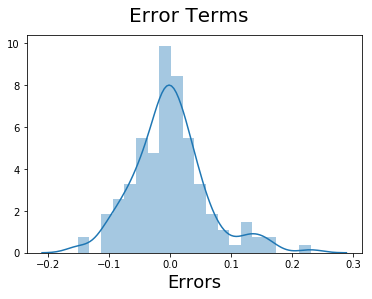

In [1669]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Here we see that the error terms are present around 0.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [1670]:
#Scale the test data on the scale that was fit on the train data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

car_ID  symboling  doornumber  wheelbase  carlength   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio     stroke  compressionratio  horsepower    peakrpm    citympg  highwaympg      price  alfa-romeo       audi        bmw      buick  chevrolet      dodge      honda      isuzu  jaguar      mazda    mercury  mitsubishi     nissan    peugeot   plymouth    porsche  renault       saab     subaru     toyota  volkswagen      volvo        gas      turbo    hardtop  hatchback      sedan      wagon        fwd        rwd        fwd        rwd       rear  dohcv          l        ohc       ohcf       ohcv  rotor       2bbl  4bbl        idi        mfi       mpfi       spdi       spfi
count   62.000000  62.000000   62.000000  62.000000  62.000000  62.000000  62.000000   62.000000       62.000000   62.000000  62.000000  62.000000         62.000000   62.000000  62.000000  62.000000   62.000000  62.000000        62.0  62.000000  62.000000  62.000000       62.0  62.000000  62.000000  62.000000    62.0  62.000000  62.000000   62.000000  62.000000  62.000000  62.000000  62.000000     62.0  62.000000  62.000000  62.000000   62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   62.0  62.000000  62.000000  62.000000  62.000000   62.0  62.000000  62.0  62.000000  62.000000  62.000000  62.000000  62.000000
mean   113.322581   0.583871    0.564516   0.437764   0.559481   0.480376   0.559663    0.428470        0.232258    0.265673   0.556580   0.544314          0.209375    0.248858   0.393351   0.328405    0.363993   0.239439         0.0   0.032258   0.032258   0.048387        0.0   0.048387   0.064516   0.016129     0.0   0.064516   0.016129    0.064516   0.064516   0.048387   0.048387   0.032258      0.0   0.048387   0.016129   0.193548    0.080645   0.080645   0.887097   0.177419   0.080645   0.338710   0.451613   0.096774   0.564516   0.419355   0.564516   0.419355   0.032258    0.0   0.048387   0.806452   0.048387   0.064516    0.0   0.258065   0.0   0.112903   0.016129   0.500000   0.048387   0.016129
std     59.300782   0.271724    0.499868   0.212861   0.189947   0.165440   0.215811    0.179488        0.088288    0.162820   0.228484   0.160738          0.273690    0.163376   0.192092   0.172009    0.181845   0.233076         0.0   0.178127   0.178127   0.216335        0.0   0.216335   0.247676   0.127000     0.0   0.247676   0.127000    0.247676   0.247676   0.216335   0.216335   0.178127      0.0   0.216335   0.127000   0.398304    0.274512   0.274512   0.319058   0.385142   0.274512   0.477134   0.501716   0.298064   0.499868   0.497482   0.499868   0.497482   0.178127    0.0   0.216335   0.398304   0.216335   0.247676    0.0   0.441142   0.0   0.319058   0.127000   0.504082   0.216335   0.127000
min      4.000000   0.000000    0.000000   0.000000   0.056911   0.183333   0.141593    0.128394        0.200000    0.067925  -0.111111  -0.060606          0.000000    0.016667   0.000000   0.027778   -0.027027   0.007763         0.0   0.000000   0.000000   0.000000        0.0   0.000000   0.000000   0.000000     0.0   0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   0.000000      0.0   0.000000   0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000    0.0   0.000000   0.000000   0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.000000
25%     67.000000   0.400000    0.000000   0.313793   0.459350   0.358333   0.384956    0.305275        0.200000    0.177358   0.404762   0.484848          0.093750    0.107292   0.265306   0.166667    0.216216   0.092342         0.0   0.000000   0.000000   0.000000        0.0   0.000000   0.000000   0.000000     0.0   0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   0.000000      0.0   0.000000   0.000000   0.000000    0.00

In [1671]:
#Create X_test and Y_test from the test data
Y_test = df_test.pop('price')
X_test = df_test

In [1672]:
#Get the columns needed to perform prediction on the test set
l=list(X_train_rfe.columns)
l.remove('const')
print(l)

['bmw', 'buick', 'carwidth', 'curbweight', 'enginesize', 'peakrpm', 'porsche', 'rear', 'rotor']


In [1673]:
#Take only those columns of the test data which will be used in prediction
X_test=X_test[l]
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [1674]:
#predicting on the test set
Y_pred = lm.predict(X_test_sm)

Text(0,0.5,'y_pred')

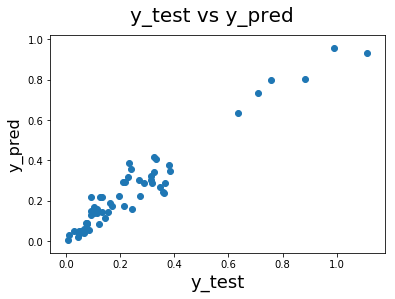

In [1675]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1676]:
#Checking the r2 score for the test set
from sklearn.metrics import r2_score
r2=r2_score(Y_test, Y_pred)
r2

0.9307662133359421

In [1677]:
lm.params

const        -0.193323
bmw           0.263073
buick         0.164225
carwidth      0.214837
curbweight    0.300479
enginesize    0.522494
peakrpm       0.100140
porsche       0.137160
rear          0.289151
rotor         0.109052
dtype: float64


We can see that the equation of our best fitted line is:

$ price = 0.263  \times  bmw + 0.164  \times  buick + 0.21 \times carwidth + 0.30 \times curbweight + 0.522 \times enginesize + 0.100 \times peakrpm + 0.137 \times porsche + 0.289 \times rear + 0.109 \times rotor$
